# <center> PROCESAMIENTO DIGITAL DE SEÑALES DE AUDIO</center>
## <center> Estabilidad, causalidad y ROC</center>      

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from  matplotlib import patches
from matplotlib.pyplot import axvline, axhline

from scipy import signal

### Descripción

En este ejercicio se estudia la estabilidad y causalidad de un sistema SLIT analizando el diagrama de polos y ceros de su transferencia, $H(z)$, y en particular la región de convergencia de las secuencias $h[n]$ que le dan lugar. 

### Cómo correr el notebook
Se puede bajar y correr el notebook de forma local en una computadora.

O también se puede correr en Google Colab usando el siguiente enlace. 

<table align="center">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/mrocamora/audio-dsp/blob/main/notebooks/audioDSP-ROC_example.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

### Diagrama de polos y ceros

Considere un sistema con respuesta al impulso $h[n]$, para el cual su transformada $\mathcal{Z}$, $H(z)$, tiene el diagrama de polos y ceros de la siguiente figura.

$$H(z) = \sum_{n=-\infty}^{\infty} h[n] \, z^{-n}$$

Recuerde que dada $H(z)$ como un cociente de polinomios con dos raíces en el denominador (i.e. dos polos) como en el ejemplo, se puede hacer fracciones simples y obtener dos términos por separados. Cada uno de esos términos no tiene una única antitransformada $\mathcal{Z}$, es decir, hay más de una secuencia que da lugar a la misma expresión en $\mathcal{Z}$. Pero las secuencias difieren en la región de convergencia y se puede probar que dicha región de convergencia depende del módulo de los polos. Entonces, para el caso de este ejemplo, existen tres posibles antitransformadas $\mathcal{Z}$ que si uno transformas esas secuencias temporales obtiene la misma expresión, pero cada una de ellas corresponde a una transformada $\mathcal{Z}$ con una región de convergencia distinta. Así, no hay una única antitransformada, pero si una única antitransformada para cada pareja compuesta por la expesión en $$z$$ y su región de convergencia. 


In [2]:
# zeros and poles
p = np.array([1/2, -2])
z = np.array([0, 0])

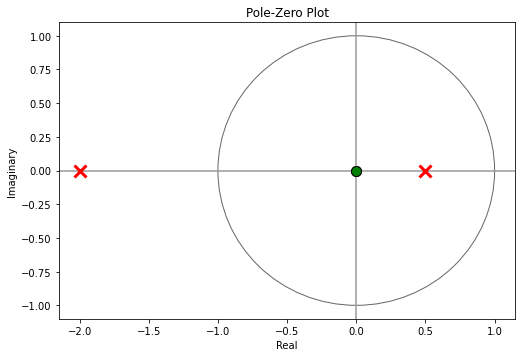

In [3]:
# plot zero pole diagram
plt.figure(figsize=(18, 12))
ax1 = plt.subplot(2, 1, 1)
ax = plt.subplot(2, 2, 1)
# unit circle and zero axes    
unit_circle = patches.Circle((0,0), radius=1, fill=False,
                             color='black', ls='solid', alpha=0.6)
ax.add_patch(unit_circle)
axvline(0, color='0.6')
axhline(0, color='0.6')

# plot the zeros and set marker properties    
t1 = plt.plot(z.real, z.imag, 'go', ms=10)
plt.setp(t1, markersize=10.0, markeredgewidth=1.0,
         markeredgecolor='k', markerfacecolor='g')
# plot the poles and set marker properties
t2 = plt.plot(p.real, p.imag, 'rx', ms=10)
plt.setp(t2, markersize=12.0, markeredgewidth=3.0,
         markeredgecolor='r', markerfacecolor='r')

plt.title("Pole-Zero Plot")
plt.xlabel("Real")
plt.ylabel("Imaginary");

### Preguntas

Responda las siguientes preguntas.
1. Hay tres posibles regiones de convergencia (ROC) para este diagrama de polos y ceros. ¿Cuáles son? ¿Por qué?
2. Suponga que el sistema $h[n]$ dado por el diagrama de polos y ceros es **estable**. ¿Cuál es la condición que debe cumplir la respuesta al impulso $h[n]$ de un sistema SLIT para que sea estable?
3. Suponga que el sistema $h[n]$ dado por el diagrama de polos y ceros es **estable**. ¿Cuál es la ROC resultante en ese caso? ¿Por qué? 
4. Suponga que el sistema $h[n]$ dado por el diagrama de polos y ceros es **estable**. Recordar que dado un polo complejo $p$, la solución asociada a tener una ROC $|z| > |p|$ da lugar a una secuencia a la derecha o hacia adelante, y que la solución asociada a tener una ROC $|z| < |p|$ da lugar a una secuencia a la izquierda o hacia atrás. ¿Es **causal** dicho sistema? ¿Por qué?
5. Ahora suponga que el sistema $h[n]$ dado por el diagrama de polos y ceros es **causal**. ¿Cuál es la ROC resultante? ¿Por qué?
6. Suponga que el sistema $h[n]$ dado por el diagrama de polos y ceros es **causal**. ¿Es **estable** dicho sistema? ¿Por qué?


**Ejemplo 3.7 del libro:** *V. Oppenheim, Ronald W. Schafer, and John R. Buck. 1999. Discrete-time signal processing (2nd ed.). Prentice-Hall, Inc., USA.*